<a href="https://colab.research.google.com/github/nnislam/How-to-find-proximal-side-chian-group/blob/main/SVM_Model_May10th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Importing

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = 'gdrive/MyDrive/Naeyma/PMM2/Data/Imbalanced_Scaled_10Feature_AlphaAll_Loc/MutR_10ScaledF_cata_NumCata.xlsx'

In [ ]:
# ls gdrive/MyDrive/PMM2/Data/

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Put the whole data (imbalaanced- known_Unknown)data in Panda DataFrame

In [ ]:
df_Unbalanced = pd.read_excel(path)

In [ ]:
df_Unbalanced

,Mut_aranged,RG,SASA,RMSD,Tensor of inertia,Free energy of stability,Contact,Total H bonds,Helix,Beta,Coil,HGMD_Clinvar_1_clinvar_call_1_alphaMi,location
0,M1I,-0.480529,-1.342104,-0.602711,-0.482871,-0.360041,1.231826,0.529377,-0.332571,-0.414533,0.508718,Unknown,2
1,M1K,2.161878,1.074139,0.322571,2.936939,-0.324470,0.729350,-2.834414,-0.332571,-0.414533,0.508718,B,0
2,M1L,-0.605843,-0.018621,0.565498,-0.586374,-0.201347,-0.526839,0.133637,-1.698605,-0.414533,1.742055,DM,1
3,M1R,-0.663143,-0.188479,-0.907112,-2.566238,-0.055687,-1.029315,0.727247,-1.361312,0.772914,0.818944,B,0
4,M1T,0.844599,-0.198932,-0.999696,-1.413736,-0.437461,-1.280553,-0.064233,0.350445,-0.414533,-0.104167,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,S246C,-0.158246,0.108398,0.449801,-0.447244,-0.163723,0.226874,1.716598,-1.015588,-0.414533,1.129170,Unknown,2
1450,S246F,0.932724,1.909330,-0.440022,2.617279,-0.260442,0.226874,-0.262103,0.013153,-0.414533,0.206059,Unknown,2
1451,S246P,-1.160678,0.228734,-0.581167,-0.619480,-0.137333,0.729350,-0.064233,0.013153,-0.414533,0.206059,Unknown,2
1452,S246T,-0.700060,-0.349027,-0.185248,-1.740483,-0.040746,-0.526839,1.122987,0.350445,0.772914,-0.717052,Unknown,2


In [ ]:
df_Unbalanced.shape

(1454, 13)

# Put the SMOTE (On KNOWN) data in DataFrame

In [ ]:
df_balanced_Smore_X = pd.read_excel('gdrive/MyDrive/Naeyma/PMM2/Data/Balanced_Imbalanced_Data/Known_data_Balnaced/SMOTE/Balanced_SMOTE_X_Fetures.xlsx')

In [ ]:
df_balanced_Smore_X

,RG,SASA,RMSD,Tensor of inertia,Free energy of stability,Contact,Total H bonds,Helix,Beta,Coil
0,2.161878,1.074139,0.322571,2.936939,-0.324470,0.729350,-2.834414,-0.332571,-0.414533,0.508718
1,-0.605843,-0.018621,0.565498,-0.586374,-0.201347,-0.526839,0.133637,-1.698605,-0.414533,1.742055
2,-0.663143,-0.188479,-0.907112,-2.566238,-0.055687,-1.029315,0.727247,-1.361312,0.772914,0.818944
3,0.844599,-0.198932,-0.999696,-1.413736,-0.437461,-1.280553,-0.064233,0.350445,-0.414533,-0.104167
4,1.796704,-0.612364,0.226185,0.102863,-0.414795,0.980588,1.518728,1.041894,0.772914,-1.329937
...,...,...,...,...,...,...,...,...,...,...
286,0.306674,-1.370077,-0.427476,-0.804839,0.087563,-1.400799,-1.259916,-0.956968,-0.311347,1.021339
287,-0.763586,0.630790,-0.202196,-0.155246,-0.644872,0.630671,-0.021797,-0.032110,0.734048,-0.353964
288,0.984945,1.036312,-0.553042,0.688363,0.186069,-1.531790,0.520903,-1.015588,-0.414533,1.129170
289,0.780478,0.798426,-0.482258,0.632629,0.135749,-1.190945,0.439896,-1.092807,-0.280286,1.129170


In [ ]:
df_balanced_Smore_Y = pd.read_excel('gdrive/MyDrive/Naeyma/PMM2/Data/Balanced_Imbalanced_Data/Known_data_Balnaced/SMOTE/Balanced_SMOTE_Y_Labels.xlsx')

In [ ]:
unique_categories = df_balanced_Smore_Y['location'].unique()
category_counts = {}
for category in unique_categories:
  count = len(df_balanced_Smore_Y[df_balanced_Smore_Y['location'] == category])
  category_counts[category] = count
print(category_counts)

{0: 97, 1: 97, 3: 97}


In [ ]:
df_balanced_Smore_Y

,location
0,0
1,1
2,0
3,0
4,0
...,...
286,3
287,3
288,3
289,3


# Split the SMOTE DATA For RF MOdel

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_balanced_Smore_X, df_balanced_Smore_Y, test_size=0.2, random_state=42)


In [ ]:
y_train

,location
210,3
219,3
216,3
73,1
25,0
...,...
188,0
71,1
106,1
270,3


# SCALE The Feature

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Print unique classes in y_train to ensure all are accounted for
unique_classes_in_y_train = np.unique(y_train)
print("Unique classes in y_train:", unique_classes_in_y_train)

# Your previously defined classes array
# print("Classes array passed to compute_class_weight:", classes)

Unique classes in y_train: [0 1 3]


# Train The MOdel on SMOTE splitted train data

In [ ]:
# Train the Gradient Boosting Classifier model
svm_model_rbf = SVC(kernel='rbf', probability=True,  random_state=42)
# Train the model
svm_model_rbf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True, random_state=42)

In [ ]:
# Set up early stopping
# from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# Train the model
#rf_model.fit(X_train_scaled, y_train)
# history = rf_model.fit(X_train_scaled, y_train)

# (In case) Load The Model Because I forgot to Save the ROC, Tpr, fpr, accuracy

In [ ]:
from joblib import load
model = load('/content/gdrive/My Drive/Naeyma/PMM2/10_Feautre_Balanced_Data/MOdel/SVM/SVM_May10th.h5')

# Test The train model on SMOTE tested DAta

In [ ]:
# Predict on the test set
y_pred = svm_model_rbf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.711864406779661


# PLoting now Confusion Matrix

In [ ]:
# Confusion matrix
conf_matrix_rbf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix with RBF kernel:")
print(conf_matrix_rbf)


Confusion Matrix with RBF kernel:
[[15  4  0]
 [10  9  3]
 [ 0  0 18]]


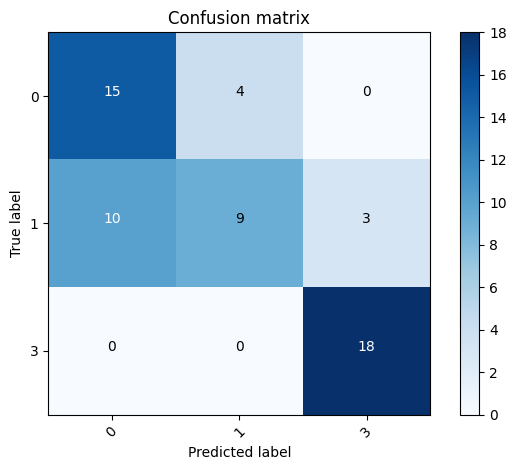

In [ ]:
def plot_confusion_matrix(conf_matrix_rbf, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(conf_matrix_rbf, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Formatting the text in the confusion matrix boxes
    thresh = conf_matrix_rbf.max() / 2.
    it = np.nditer(conf_matrix_rbf, flags=['multi_index'])
    while not it.finished:
        i, j = it.multi_index
        plt.text(j, i, format(conf_matrix_rbf[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix_rbf[i, j] > thresh else "black")
        it.iternext()

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Assuming cm is the confusion matrix and classes are the unique labels
plot_confusion_matrix(conf_matrix_rbf, classes=[0, 1, 3])

# Plotting ROC on SMOTE tested Data predicted By Semi-Supervised Model

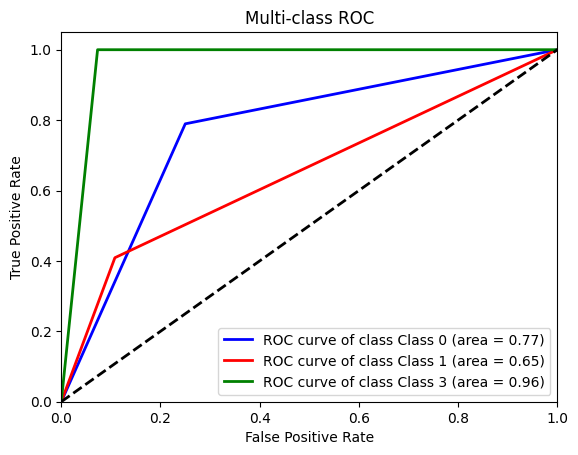

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 3])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 3])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
name = ['Class 0', 'Class 1', 'Class 3']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(name[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()



# Save the Model

In [ ]:
import joblib
joblib.dump(svm_model_rbf,'/content/gdrive/My Drive/Naeyma/PMM2/10_Feautre_Balanced_Data/MOdel/SVM/SVM_May10th.h5')

['/content/gdrive/My Drive/Naeyma/PMM2/10_Feautre_Balanced_Data/MOdel/SVM/SVM_May10th.h5']

#Find how many of the 1297 UNKNOWN data are predicted as B, DM or ambiguous by the SemiSupervised Model

In [ ]:
df_unknown = df_Unbalanced[df_Unbalanced['HGMD_Clinvar_1_clinvar_call_1_alphaMi'] == 'Unknown']

In [ ]:
df_unknown

,Mut_aranged,RG,SASA,RMSD,Tensor of inertia,Free energy of stability,Contact,Total H bonds,Helix,Beta,Coil,HGMD_Clinvar_1_clinvar_call_1_alphaMi,location
0,M1I,-0.480529,-1.342104,-0.602711,-0.482871,-0.360041,1.231826,0.529377,-0.332571,-0.414533,0.508718,Unknown,2
42,L8F,-0.116003,1.876259,-0.945640,-0.996720,-0.070318,-0.024364,-0.262103,-1.361312,-0.414533,1.431829,Unknown,2
43,L8H,0.129953,-1.138204,-0.424778,0.917223,-0.326850,0.729350,2.508078,-1.015588,-0.993775,1.431829,Unknown,2
45,L8P,-0.833789,0.008898,-0.869230,-1.265023,-0.443088,0.226874,-0.855713,2.407927,-2.181223,-1.027277,Unknown,2
46,L8R,1.990215,0.265301,2.010230,2.000935,0.283921,-0.275601,-2.240804,1.379186,-0.993775,-0.717052,Unknown,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,S246C,-0.158246,0.108398,0.449801,-0.447244,-0.163723,0.226874,1.716598,-1.015588,-0.414533,1.129170,Unknown,2
1450,S246F,0.932724,1.909330,-0.440022,2.617279,-0.260442,0.226874,-0.262103,0.013153,-0.414533,0.206059,Unknown,2
1451,S246P,-1.160678,0.228734,-0.581167,-0.619480,-0.137333,0.729350,-0.064233,0.013153,-0.414533,0.206059,Unknown,2
1452,S246T,-0.700060,-0.349027,-0.185248,-1.740483,-0.040746,-0.526839,1.122987,0.350445,0.772914,-0.717052,Unknown,2


In [ ]:
X_unknown = df_unknown.drop(['Mut_aranged', 'HGMD_Clinvar_1_clinvar_call_1_alphaMi', 'location', ], axis=1)
y_unknown= df_unknown['location']

In [ ]:
# scaler = StandardScaler()
# X_unknown_scaled = scaler.fit_transform(X_unknown)
pred_unknown  = svm_model_rbf.predict(X_unknown)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
pred_unknown

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
unique_elements = np.unique(pred_unknown)
unique_elements

array([0, 1, 3])

In [ ]:
num_categories = len(unique_elements)

In [ ]:
print("Unique categories:", unique_elements)
print("Number of unique categories:", num_categories)

Unique categories: [0 1 3]
Number of unique categories: 3


In [ ]:
unique_elements, counts = np.unique(pred_unknown, return_counts=True)

In [ ]:
categories_1= []
counts_1 = []
for category, count in zip(unique_elements, counts):
    categories_1.append(category)
    counts_1.append(count)
    # print(f"Category {category} appears {count} times.")

In [ ]:
counts_1

[578, 464, 255]

# Make a dataframe where we added a SSM(semi supervised Model) predicted label with our original UNKNOWN existing DataFrame and SAVE them

In [ ]:
pred_unknown

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
df_unknown['predicted_SVM'] = pred_unknown

<ipython-input-124-c1c3bc5e8d6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unknown['predicted_SVM'] = pred_unknown


In [ ]:
df_unknown.to_excel('/content/gdrive/My Drive/Naeyma/PMM2/10_Feautre_Balanced_Data/Data/UNKNOWN/Unknown_PreictedBySVM.xlsx')

In [ ]:
df_unknown

,Mut_aranged,RG,SASA,RMSD,Tensor of inertia,Free energy of stability,Contact,Total H bonds,Helix,Beta,Coil,HGMD_Clinvar_1_clinvar_call_1_alphaMi,location,predicted_SVM
0,M1I,-0.480529,-1.342104,-0.602711,-0.482871,-0.360041,1.231826,0.529377,-0.332571,-0.414533,0.508718,Unknown,2,0
42,L8F,-0.116003,1.876259,-0.945640,-0.996720,-0.070318,-0.024364,-0.262103,-1.361312,-0.414533,1.431829,Unknown,2,0
43,L8H,0.129953,-1.138204,-0.424778,0.917223,-0.326850,0.729350,2.508078,-1.015588,-0.993775,1.431829,Unknown,2,0
45,L8P,-0.833789,0.008898,-0.869230,-1.265023,-0.443088,0.226874,-0.855713,2.407927,-2.181223,-1.027277,Unknown,2,0
46,L8R,1.990215,0.265301,2.010230,2.000935,0.283921,-0.275601,-2.240804,1.379186,-0.993775,-0.717052,Unknown,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,S246C,-0.158246,0.108398,0.449801,-0.447244,-0.163723,0.226874,1.716598,-1.015588,-0.414533,1.129170,Unknown,2,0
1450,S246F,0.932724,1.909330,-0.440022,2.617279,-0.260442,0.226874,-0.262103,0.013153,-0.414533,0.206059,Unknown,2,0
1451,S246P,-1.160678,0.228734,-0.581167,-0.619480,-0.137333,0.729350,-0.064233,0.013153,-0.414533,0.206059,Unknown,2,0
1452,S246T,-0.700060,-0.349027,-0.185248,-1.740483,-0.040746,-0.526839,1.122987,0.350445,0.772914,-0.717052,Unknown,2,1


# Plot The Mutated Residue which are Unknown but now Predicted by SS

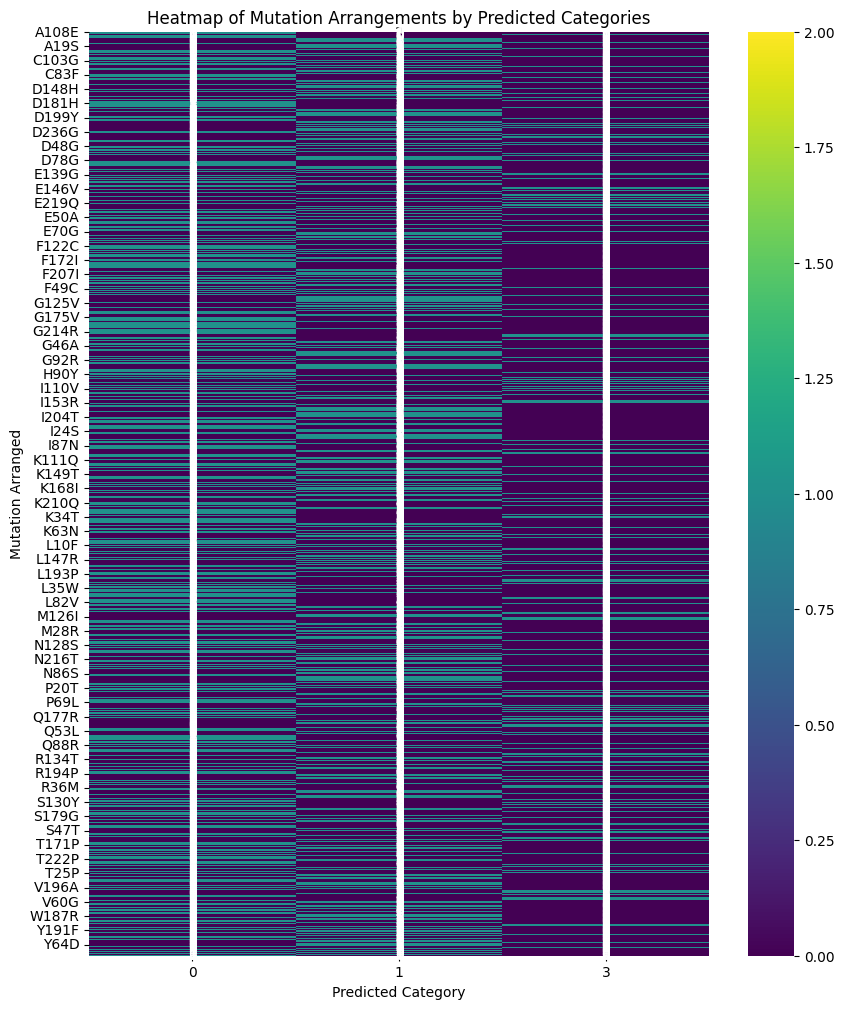

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for heatmap
heatmap_data = pd.crosstab(df_unknown['Mut_aranged'], df_unknown['predicted_SVM'])

# Create a heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='d')
plt.title('Heatmap of Mutation Arrangements by Predicted Categories')
plt.xlabel('Predicted Category')
plt.ylabel('Mutation Arranged')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

print(categories_1)
print(counts_1)



[0, 1, 3]
[578, 464, 255]


In [ ]:
# Your original list of categories
categories_1 = [0, 1, 3]

# Mapping from numerical labels to strings
category_labels = {
    0: "Benign",
    1: "Damaging",
    3: "Ambiguous"
}

# Replace elements in the list based on the mapping
replaced_categories = [category_labels[category] for category in categories_1]

# Print the updated list
print(replaced_categories)

['Benign', 'Damaging', 'Ambiguous']


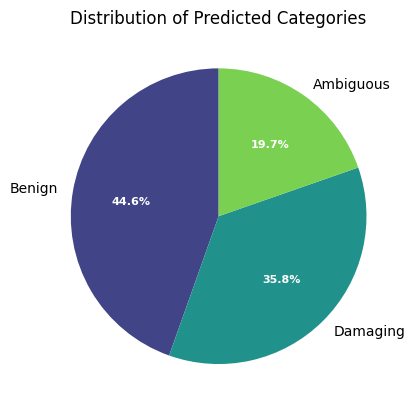

In [ ]:
# Colors
colors = plt.cm.viridis([0.2, 0.5, 0.8])

# Plotting the pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(counts_1, labels=replaced_categories, autopct='%1.1f%%', startangle=90, colors=colors)

# Beautify the plot
ax.set_title('Distribution of Predicted Categories')
plt.setp(autotexts, size=8, weight="bold", color="white")

# Display the plot
plt.show()

In [ ]:
tpr

{0: array([0.        , 0.78947368, 1.        ]),
 1: array([0.        , 0.40909091, 1.        ]),
 2: array([0., 1., 1.])}

In [ ]:
fpr

{0: array([0.  , 0.25, 1.  ]),
 1: array([0.        , 0.10810811, 1.        ]),
 2: array([0.        , 0.07317073, 1.        ])}

In [ ]:
roc_auc

{0: 0.7697368421052632, 1: 0.6504914004914005, 2: 0.9634146341463415}

In [ ]:
accuracy

0.711864406779661